## Data Cleaning

### Print and plot Nan values within DF features

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


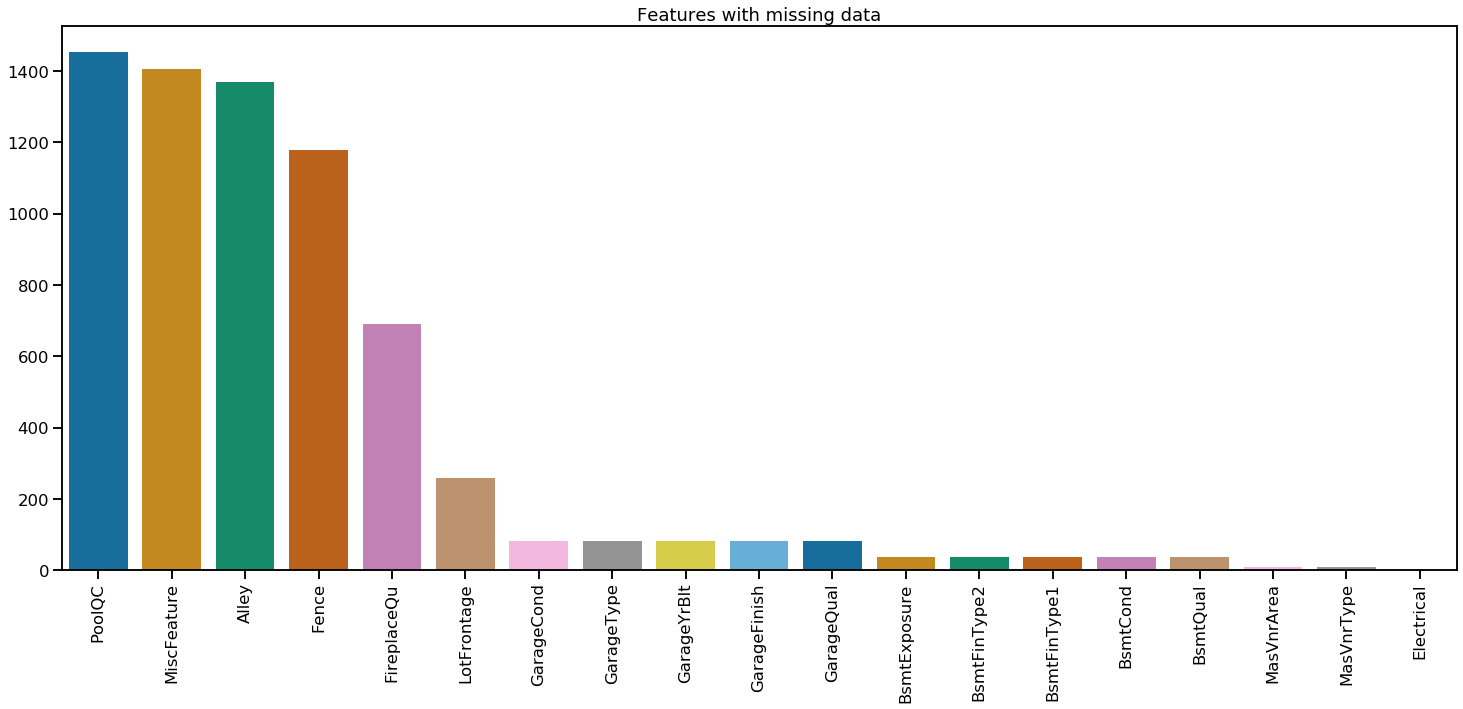

In [4]:
print(f'{df.isna().sum().sort_values(ascending=False)[:19]}')

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(25,10))
c = df.isna().sum().sort_values(ascending=False)[:19]
ax = sns.barplot(y=c, x=c.index, palette='colorblind' )
plt.xticks(rotation =90)
plt.title('Features with missing data');

### Print and plot different types of data

Different features data types within the dataframe: 

object     43
int64      35
float64     3
dtype: int64


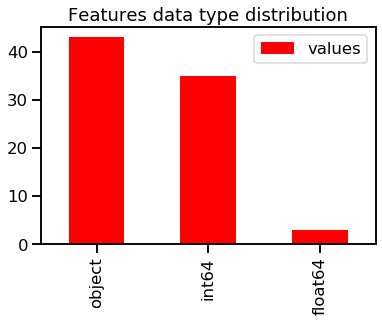

In [82]:
print('Different features data types within the dataframe: \n')
print(df.dtypes.value_counts())

new = pd.DataFrame(data=df.dtypes.value_counts(), columns=['values'])
new.plot(kind='bar', color='r', title='Features data type distribution');

At this point is important to indentify all columns that are Object data type

In [10]:
# Create a new df1 Dataframe, which will be used as our train set
train_df = df

# Check Objects features 
l = []
for label, content in train_df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)
        l.append(label)
print(f'Number of Object dtype colums is: {len(l)}')

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
Number of Object dtype colums is: 43


## Train set data cleaning

### Turn Object data into Categorical 

In [15]:
for label, content in train_df.items():
    if pd.api.types.is_object_dtype(content):
        train_df[label] = content.astype('category').cat.as_ordered()

In [16]:
train_df.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

### Find and fill Numerical data with median

In [17]:
# Find numerical data using Pandas api
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [18]:
# Fill missing values with median
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_df[label+'_is_missing'] = pd.isnull(content) # Add a binary column which tells whether data was missing
            train_df[label] = content.fillna(content.median()) # Fill missing data

**Considerations:** 
 
* We add the binary column to keep info of initial missing data, which otherwise will be lost

* We use the median instead of the mean because is more robust with outliesthan mean: with lot of different values mean can change drastically while the median keep consistency between values

### Turn categorical into numbers

In [19]:
# Check which has missing data
for label, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to record whether there were missing data
        train_df[label+'_is_missing'] = pd.isnull(content)
        # Turn all data into numbers
        train_df[label] = pd.Categorical(content).codes+1 

**Note**: +1 is added during conversion because all missing data is represented by -1. 

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


In [21]:
train_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
PoolQC_is_missing,True,True,True,True,True
Fence_is_missing,True,True,True,True,True
MiscFeature_is_missing,True,True,True,True,True
SaleType_is_missing,False,False,False,False,False


## Test set 

### Preprocess function

Same transformation process will be applied to test dataset, but this time using an helper function.

#### Preprocessing data function

Turn all data into numerical and fill missing data

In [22]:
def preprocess_data(df):
    """
    Performs transformations on the df(DataFrame) and returns transformed df
    """
    
    # Fill NUMERICAL missing data
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill numeric values with median
                df[label] = content.fillna(content.median())            
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # Convert the non numeric to categorical and then access to their codes and eventually add+1
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [25]:
test_df = pd.read_csv('C:/Users/david/OneDrive/Desktop/Python/Machine_learning_and_Data_Science/10.My_Projects/My_Projects_Data/3. House_prices_advanced_regression/test.csv')
preprocess_data(test_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,21.0,1936,2,0,4,4,1,...,False,False,True,True,False,True,True,True,False,False
1455,2916,160,5,21.0,1894,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1456,2917,20,4,160.0,20000,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1457,2918,85,4,62.0,10441,2,0,4,4,1,...,False,False,True,True,False,True,False,False,False,False


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 134 entries, Id to SaleCondition_is_missing
dtypes: bool(54), float64(11), int64(26), int8(43)
memory usage: 560.1 KB
